<a href="https://colab.research.google.com/github/comparativechrono/Rephasing-of-Seasonal-Birth-Rates-in-the-United-Kingdom-/blob/main/Figures/Figure_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Figure 1 - panel A

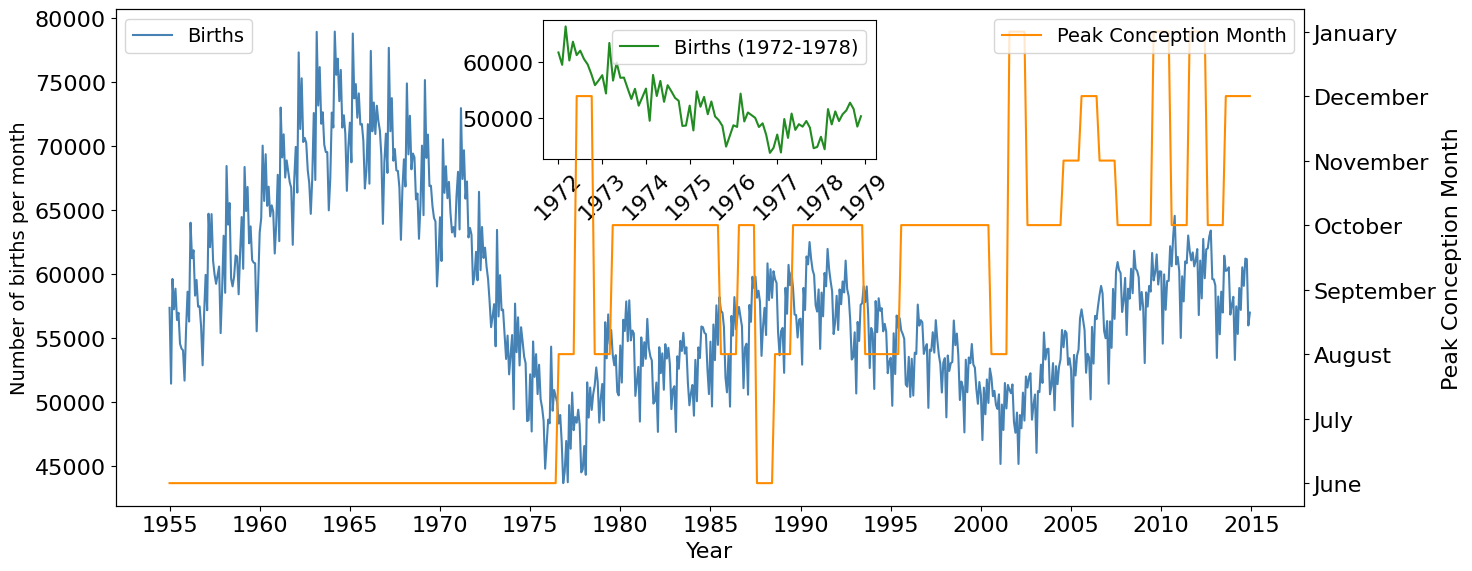

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.rcParams.update({'font.size': 16})  # Change '16' to your preferred font size.

# Import data from the CSV file named 'data.csv'
data = pd.read_csv('data.csv', names=['Year', 'Month', 'Births', 'PeakConceptionMonth'])

# Capitalize the first letter of each month name
data['Month'] = data['Month'].str.capitalize()

# Combine 'Year' and 'Month' to a 'Date' column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + ' ' + data['Month'], format='%Y %B')

# Create a new figure with a specific size (width, height)
fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'steelblue'
ax1.set_xlabel('Year', color='black')
ax1.set_ylabel('Number of births per month', color='black', fontsize=14)
ax1.plot(data['Date'], data['Births'], color=color, label='Births')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)  # Remove gridlines

ax2 = ax1.twinx()
color = 'darkorange'

# Setting the labels for y-axis
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
ax2.set_yticks(range(6, 14))
ax2.set_yticklabels(months[0:8])

ax2.set_ylabel('Peak Conception Month', color='black')
ax2.plot(data['Date'], data['PeakConceptionMonth'], color=color, label='Peak Conception Month')
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(False)  # Remove gridlines

# Automatically adjust subplot parameters to give specified padding
fig.tight_layout()

# plt.title('Births and Peak Conception Month Over the Years', fontsize=20, color='black')

# Create a set of inset Axes: these should fill the bounding box allocated to them
ax3 = inset_axes(ax2, width="28%", height="28%", loc=9)  # loc=9 for center top
ax3.plot(data.loc[(data['Year'] >= 1972) & (data['Year'] <= 1978), 'Date'],
         data.loc[(data['Year'] >= 1972) & (data['Year'] <= 1978), 'Births'], color='forestgreen', label='Births (1972-1978)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(False)  # Remove gridlines

# Move ax2 to the top layer
ax2.set_zorder(ax1.get_zorder() + 1)
ax2.patch.set_visible(False)

# Add legends
ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)
ax3.legend(loc='upper right', fontsize=14)

# Adjust x-axis to go up in 5-year increments
years = mdates.YearLocator(5)
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Save the plot with 300 DPI
plt.savefig('births_and_peak_conception.png', dpi=300)

# Show the plot
plt.show()


Figure 1 - panel B

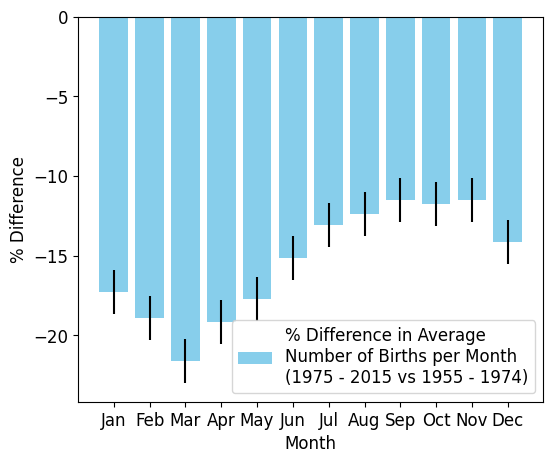

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams.update({'font.size': 12})

# Import data from the CSV file named 'data.csv'
data = pd.read_csv('data.csv', names=['Year', 'Month', 'Births', 'PeakConceptionMonth'])

# Capitalize the first letter of each month name
data['Month'] = data['Month'].str.capitalize()

# Combine 'Year' and 'Month' to a 'Date' column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + ' ' + data['Month'], format='%Y %B')

# Create a new column 'MonthNum' to represent month in numerical format
data['MonthNum'] = data['Date'].dt.month

# Separate data into two periods
data_1955_1974 = data[(data['Year'] >= 1955) & (data['Year'] <= 1974)]
data_1975_2015 = data[(data['Year'] >= 1975) & (data['Year'] <= 2015)]

# Calculate mean and standard error for both periods
grouped_1955_1974 = data_1955_1974.groupby('MonthNum')['Births'].agg(['mean', 'sem'])
grouped_1975_2015 = data_1975_2015.groupby('MonthNum')['Births'].agg(['mean', 'sem'])

# Create plot
fig, ax = plt.subplots(figsize=(6, 5))

months = list(range(1, 13))

# Plot percentage difference in average values for each month
percentage_difference = ((grouped_1975_2015['mean'] - grouped_1955_1974['mean']) / grouped_1955_1974['mean']) * 100

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Initialize an array to hold the bootstrap samples
bootstrap_samples = np.zeros(n_bootstrap_samples)

# Perform the bootstrap sampling and calculate percentage difference
for i in range(n_bootstrap_samples):
    # Sample with replacement from each condition
    bootstrap_sample_1955_1974 = np.random.choice(grouped_1955_1974['mean'], size=len(grouped_1955_1974['mean']), replace=True)
    bootstrap_sample_1975_2015 = np.random.choice(grouped_1975_2015['mean'], size=len(grouped_1975_2015['mean']), replace=True)

    # Calculate the percentage difference for this bootstrap sample
    bootstrap_samples[i] = (np.mean(bootstrap_sample_1975_2015) - np.mean(bootstrap_sample_1955_1974)) / np.mean(bootstrap_sample_1955_1974) * 100

# Calculate the standard error of the percentage difference
sem_bootstrap = np.std(bootstrap_samples)

# Plot the percentage difference with error bars
ax.bar(months, percentage_difference, yerr=sem_bootstrap, color='skyblue')
ax.legend(['% Difference in Average\nNumber of Births per Month\n(1975 - 2015 vs 1955 - 1974)'], loc='lower right')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('% Difference', fontsize=12)
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.savefig('percentage_difference_bpm.png', dpi=300)
plt.show()
